# Import library yang dibutuhkan

In [18]:
# Import library pandas dengan alias 'pd'
import pandas as pd

# Import library numpy dengan alias 'np'
import numpy as np

# Import library seaborn dengan alias 'sns'
import seaborn as sns

# Import library Plotly Express dengan alias 'px'
import plotly.express as px

# Import library matplotlib.pyplot dengan alias 'plt'
import matplotlib.pyplot as plt

# Import library untuk membagi data latih dan uji
from sklearn.model_selection import train_test_split

# Import model regresi linier dari scikit-learn
from sklearn.linear_model import LinearRegression

# Import metrik evaluasi untuk regresi linier
from sklearn.metrics import mean_squared_error, r2_score


# Membaca file CSV dari Github

In [19]:
# URL ke file CSV di GitHub yang akan diimpor
url = 'https://raw.githubusercontent.com/hananlu/basicPython/master/Dataset/usaCars.csv'

# Membaca file CSV dari URL ke dalam DataFrame menggunakan pandas
df = pd.read_csv(url)

# Garis pemisah antara dua blok informasi
print("=" * 50)

# Menampilkan informasi rinci tentang DataFrame
df.info()

# Garis pemisah antara dua blok informasi
print("=" * 50)

# Menampilkan beberapa 5 baris pertama dari DataFrame untuk memeriksa data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Menghitung jumlah baris dan kolom

In [20]:
# Menampilkan banyaknya baris dan kolom
jumlah_baris, jumlah_kolom = df.shape

# Menampilkan hasil
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")



Jumlah Baris: 2499
Jumlah Kolom: 13


Ringkasan statistik deskriptif dari DataFrame

In [21]:
# Menampilkan ringkasan statistik deskriptif
summary_stats = df.describe()

# Menyajikan ringkasan statistik deskriptif dalam bentuk yang lebih rapi
summary_stats = summary_stats.transpose()  # Transpose DataFrame untuk menampilkan kolom sebagai variabel
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]  # Menentukan urutan kolom yang diinginkan
summary_stats.columns = ['Jumlah', 'Rata-rata', 'Deviasi Standar', 'Minimum', 'Kuartil 1', 'Median', 'Kuartil 3', 'Maksimum']  # Menetapkan nama kolom yang lebih deskriptif

# Menampilkan ringkasan statistik deskriptif yang sudah diubah
print(summary_stats)

'''
Kode yang telah diperbarui bertujuan untuk menampilkan ringkasan statistik deskriptif dari DataFrame dengan cara yang lebih terstruktur dan mudah dibaca. Berikut adalah penjelasan fungsinya:

1. summary_stats = df.describe(): Menggunakan metode describe() dari pandas untuk menghasilkan ringkasan statistik deskriptif seperti count, mean, std, min, 25%, 50%, 75%, dan max dari setiap kolom dalam DataFrame df.

2. summary_stats = summary_stats.transpose(): Transpose DataFrame agar variabel menjadi baris dan statistik deskriptifnya menjadi kolom. Ini mempermudah pembacaan dan interpretasi, karena setiap baris sekarang mewakili satu variabel.

3. summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]: Memilih kolom-kolom yang diinginkan dari statistik deskriptif. Kolom-kolom yang dipilih adalah count (jumlah), mean (rata-rata), std (deviasi standar), min (nilai minimum), 25%, 50% (median), 75%, dan max (nilai maksimum).

4. summary_stats.columns = ['Jumlah', 'Rata-rata', 'Deviasi Standar', 'Minimum', 'Kuartil 1', 'Median', 'Kuartil 3', 'Maksimum']: Memberikan nama yang lebih deskriptif pada setiap kolom untuk meningkatkan kejelasan.

5. print(summary_stats): Menampilkan ringkasan statistik deskriptif yang sudah diubah dan diatur dengan cara yang lebih rapi.

'''


            Jumlah     Rata-rata  Deviasi Standar      Minimum    Kuartil 1  \
Unnamed: 0  2499.0  1.249000e+03       721.543484          0.0        624.5   
price       2499.0  1.876767e+04     12116.094936          0.0      10200.0   
year        2499.0  2.016714e+03         3.442656       1973.0       2016.0   
mileage     2499.0  5.229869e+04     59705.516356          0.0      21466.5   
lot         2499.0  1.676914e+08    203877.210516  159348797.0  167625331.0   

                 Median    Kuartil 3     Maksimum  
Unnamed: 0       1249.0       1873.5       2498.0  
price           16900.0      25555.5      84900.0  
year             2018.0       2019.0       2020.0  
mileage         35365.0      63472.5    1017936.0  
lot         167745058.0  167779772.0  167805500.0  


"\nKode yang telah diperbarui bertujuan untuk menampilkan ringkasan statistik deskriptif dari DataFrame dengan cara yang lebih terstruktur dan mudah dibaca. Berikut adalah penjelasan fungsinya:\n\n1. summary_stats = df.describe(): Menggunakan metode describe() dari pandas untuk menghasilkan ringkasan statistik deskriptif seperti count, mean, std, min, 25%, 50%, 75%, dan max dari setiap kolom dalam DataFrame df.\n\n2. summary_stats = summary_stats.transpose(): Transpose DataFrame agar variabel menjadi baris dan statistik deskriptifnya menjadi kolom. Ini mempermudah pembacaan dan interpretasi, karena setiap baris sekarang mewakili satu variabel.\n\n3. summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]: Memilih kolom-kolom yang diinginkan dari statistik deskriptif. Kolom-kolom yang dipilih adalah count (jumlah), mean (rata-rata), std (deviasi standar), min (nilai minimum), 25%, 50% (median), 75%, dan max (nilai maksimum).\n\n4. summary_stats.columns

DataFrame merk paling populer

In [22]:
# Mengelompokkan DataFrame berdasarkan merek dan menghitung jumlah kendaraan
df_3 = df.groupby("brand").brand.count()

# Mengurutkan jumlah kendaraan secara menurun
df_4 = df_3.sort_values(ascending=False)

# Menampilkan daftar merek kendaraan yang paling populer
print(df_4)



brand
ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
honda                12
infiniti             12
mercedes-benz        10
cadillac             10
heartland             5
audi                  4
peterbilt             4
land                  4
acura                 3
lincoln               2
mazda                 2
lexus                 2
maserati              1
jaguar                1
harley-davidson       1
ram                   1
toyota                1
Name: brand, dtype: int64


DataFrame model paling populer

In [23]:
# Mengelompokkan DataFrame berdasarkan model dan menghitung jumlah kendaraan
df_model_count = df.groupby("model").model.count()

# Mengurutkan jumlah kendaraan secara menurun
df_sorted_models = df_model_count.sort_values(ascending=False)

# Menampilkan daftar model kendaraan yang paling populer
print(df_sorted_models)



model
door           651
f-150          219
doors          148
caravan        102
mpv             87
              ... 
road/street      1
cx-3             1
f-750            1
cruiser          1
xterra           1
Name: model, Length: 127, dtype: int64


Contoh perkiraan harga model door

In [24]:
# Membuat DataFrame baru hanya dengan data model 'door'
door_df = df[df['model'] == 'door']

# Menampilkan statistik deskriptif untuk harga model 'door'
door_price_stats = door_df['price'].describe()

# Menampilkan ringkasan statistik deskriptif untuk harga model 'door'
print("Statistik Deskriptif untuk Harga Model 'door':")
print(door_price_stats.to_frame().transpose().rename(
    columns={'count': 'Jumlah', 'mean': 'Rata-rata', 'std': 'Deviasi Standar', 'min': 'Minimum',
             '25%': 'Kuartil 1', '50%': 'Median', '75%': 'Kuartil 3', 'max': 'Maksimum'}
))



Statistik Deskriptif untuk Harga Model 'door':
       Jumlah     Rata-rata  Deviasi Standar  Minimum  Kuartil 1  Median  \
price   651.0  12402.202765     11018.390628      0.0     4000.0  9200.0   

       Kuartil 3  Maksimum  
price    18150.0   56500.0  


Menampilkan grafik distribusi merk berdasarkan harga (Termahal ke murah)

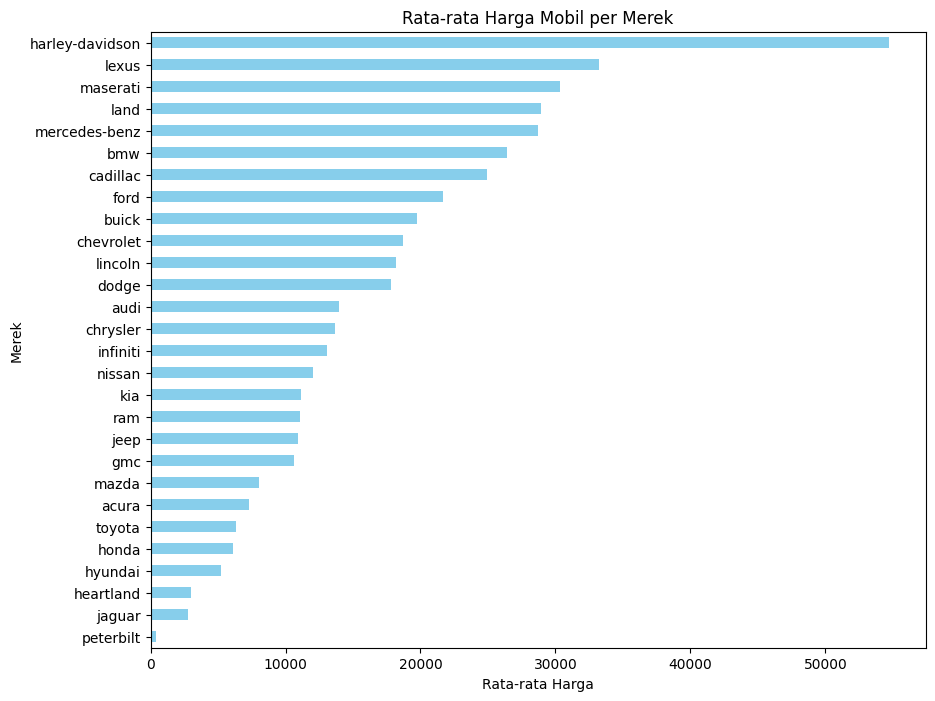

In [25]:
# Mengelompokkan DataFrame berdasarkan merek dan menghitung rata-rata harga
df_1 = df.groupby(["brand"]).price.mean()

# Mengurutkan rata-rata harga secara menurun
df_2 = df_1.sort_values(ascending=True)

# Menampilkan diagram batang horizontal (barh)
plt.figure(figsize=(10, 8))
df_2.plot(kind="barh", color='skyblue')
plt.title('Rata-rata Harga Mobil per Merek')
plt.xlabel('Rata-rata Harga')
plt.ylabel('Merek')
plt.show()

Menampilkan grafik distribusi merk mobil

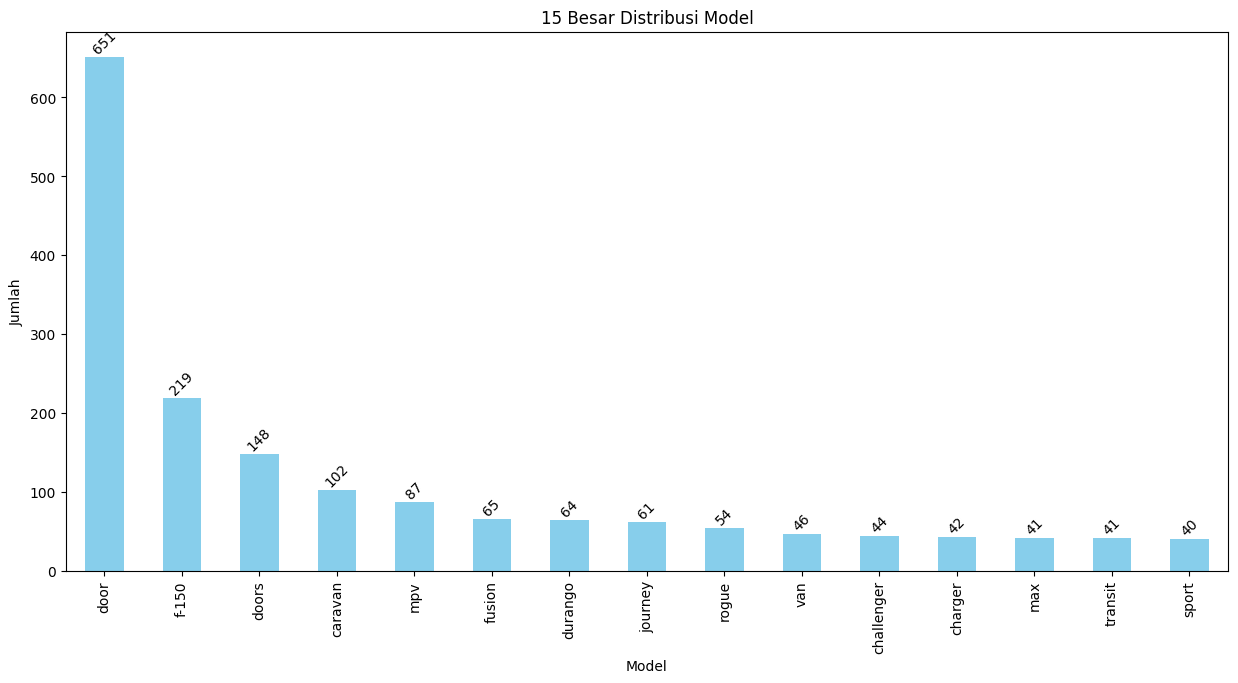

In [26]:
# Menghitung jumlah setiap merk
merk_counts = df['model'].value_counts()

# Mengambil 15 merk teratas
top_15_merks = merk_counts.head(15)

# Menyiapkan plot
plt.figure(figsize=(15, 7))
bars = top_15_merks.plot(kind='bar', color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Model')
plt.ylabel('Jumlah')
plt.title('15 Besar Distribusi Model')

# Menambahkan angka di atas setiap bar dengan tulisan miring
for i, value in enumerate(top_15_merks):
    plt.text(i, value + 1, str(value), rotation=45, ha='center', va='bottom', fontsize=10)  # Menyesuaikan fontsize

# Menampilkan plot
plt.show()


Menampilkan grafik distribusi negara

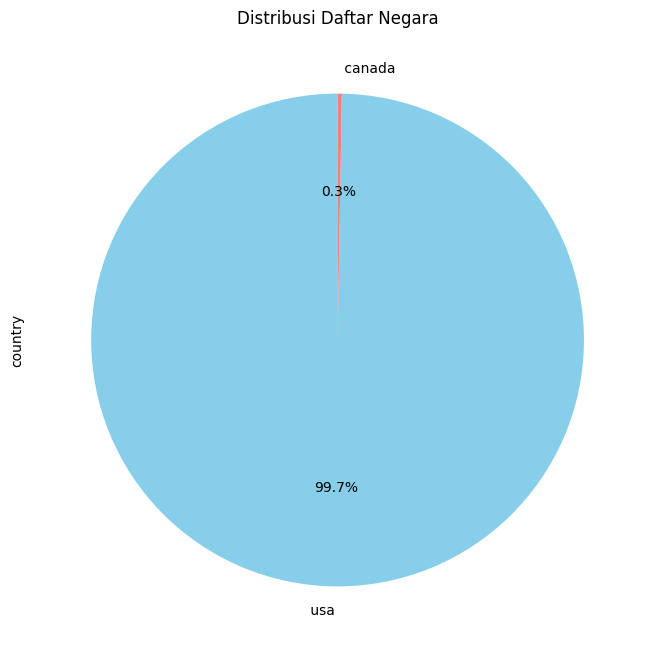

In [27]:
# Menghitung jumlah setiap negara
negara_counts = df['country'].value_counts()

# Menyiapkan plot sebagai diagram lingkaran (pie chart)
plt.figure(figsize=(8, 8))
negara_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow'])

# Menambahkan label dan judul
plt.title('Distribusi Daftar Negara')

# Menampilkan plot
plt.show()



Analisis Hubungan Regresi antara Harga dan Tahun: Visualisasi Interaktif Scatter Plot dengan Garis Regresi Ordinary Least Squares (OLS)

In [28]:
# Memilih kolom 'price' dan 'year' dari DataFrame
# Kita hanya akan menggunakan kolom 'price' dan 'year' untuk analisis regresi.
df_subset = df[['price', 'year']]

# Membuat scatter plot dengan garis regresi menggunakan Plotly Express
# Scatter plot dengan garis regresi menggunakan Plotly Express.
# 'trendline="ols"' menambahkan garis regresi OLS (Ordinary Least Squares).
scatter_plot = px.scatter(df_subset, x='year', y='price', trendline="ols", labels={'price': 'Harga', 'year': 'Tahun'})

# Menampilkan plot
# Menampilkan plot interaktif menggunakan Plotly Express.
scatter_plot.show()

Analisis Distribusi Harga: Histogram untuk Kolom 'price'

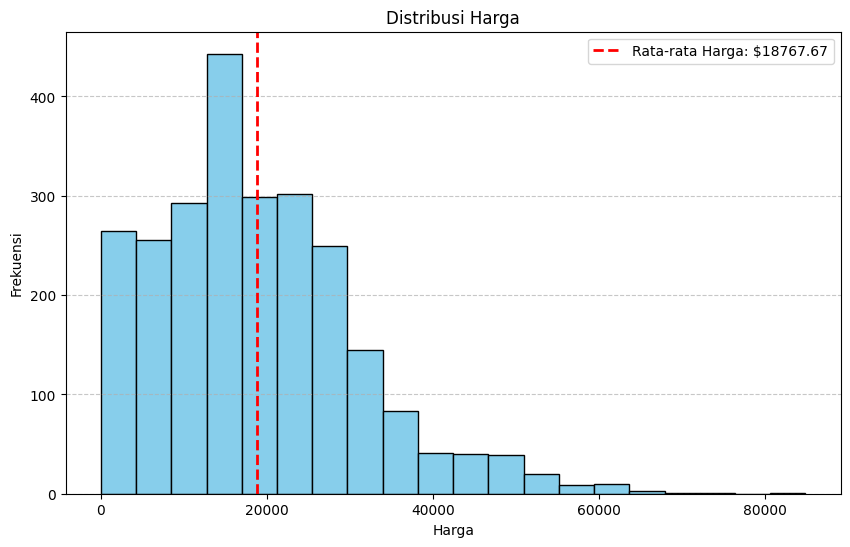

In [29]:
# Menambahkan histogram untuk kolom 'price'
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')  # Menambahkan edgecolor untuk memisahkan batang
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga')

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan garis vertikal rata-rata harga
mean_price = df['price'].mean()
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata Harga: ${mean_price:.2f}')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()



implementasi regresi linier untuk memprediksi harga berdasarkan fitur 'year' dan 'mileage' untuk kendaraan dengan tahun di atas 2010.

Evaluasi Model:
----------------
Mean Squared Error: 121000694.96
R-squared Score: 0.17


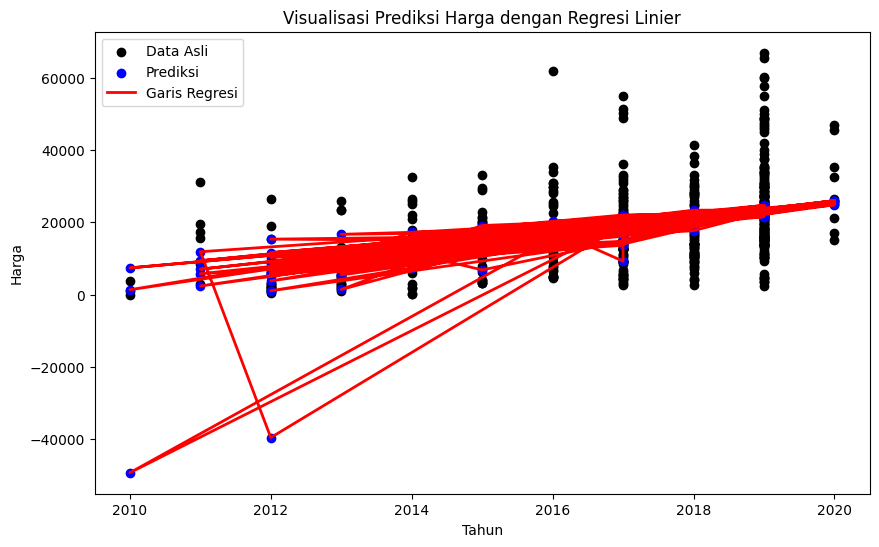

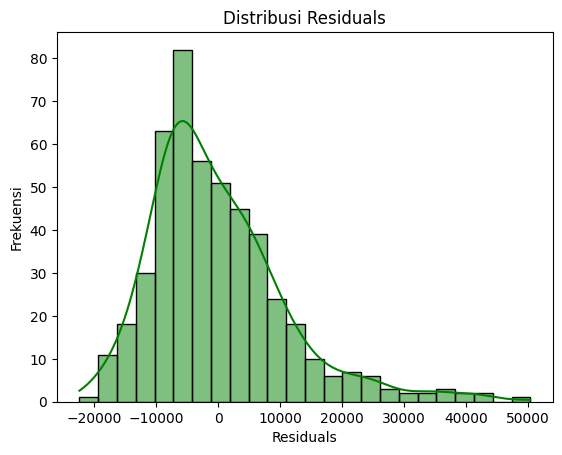

In [30]:


# Membuat model regresi linier
model_regresi = LinearRegression()

# Melatih model pada data pelatihan
model_regresi.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
harga_prediksi = model_regresi.predict(X_test)

# Menampilkan hasil evaluasi model
mse = mean_squared_error(y_test, harga_prediksi)
r2 = r2_score(y_test, harga_prediksi)
print('Evaluasi Model:')
print('----------------')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Visualisasi prediksi dengan garis regresi
plt.figure(figsize=(10, 6))
plt.scatter(X_test['year'], y_test, color='black', label='Data Asli')
plt.scatter(X_test['year'], harga_prediksi, color='blue', label='Prediksi')
plt.plot(X_test['year'], harga_prediksi, color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.title('Visualisasi Prediksi Harga dengan Regresi Linier')
plt.legend()
plt.show()

# Menampilkan distribusi residual
residuals = y_test - harga_prediksi
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.title('Distribusi Residuals')
plt.show()




Perkiraan harga untuk model F-150

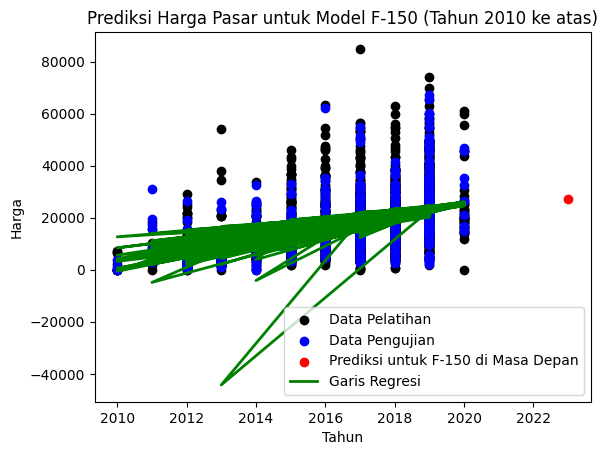

Perkiraan Harga Pasar untuk Model F-150 di Masa Depan (tahun 2010 ke atas): $27,023.40


In [33]:

# Batasi data untuk tahun 2010 ke atas
data_batas_tahun = df[df['year'] >= 2010]

# Pilih fitur yang akan digunakan untuk prediksi
X_batas_tahun = data_batas_tahun[['year', 'mileage']]
y_batas_tahun = data_batas_tahun['price']

# Membagi data menjadi data pelatihan dan pengujian
X_train_batas_tahun, X_test_batas_tahun, y_train_batas_tahun, y_test_batas_tahun = train_test_split(
    X_batas_tahun, y_batas_tahun, test_size=0.2, random_state=42
)

# Membuat model regresi linier
model_batas_tahun = LinearRegression()
model_batas_tahun.fit(X_train_batas_tahun, y_train_batas_tahun)

# Menampilkan data pelatihan
plt.scatter(X_train_batas_tahun['year'], y_train_batas_tahun, color='black', label='Data Pelatihan')

# Menampilkan data pengujian
plt.scatter(X_test_batas_tahun['year'], y_test_batas_tahun, color='blue', label='Data Pengujian')

# Menambahkan titik prediksi untuk model F-150 di masa depan
data_prediksi = pd.DataFrame([[2023, 50000]], columns=['year', 'mileage'])
harga_prediksi = model_batas_tahun.predict(data_prediksi)
plt.scatter(data_prediksi['year'], harga_prediksi, color='red', label='Prediksi untuk F-150 di Masa Depan')

# Menambahkan garis regresi untuk model yang dilatih
plt.plot(X_train_batas_tahun['year'], model_batas_tahun.predict(X_train_batas_tahun), color='green', linewidth=2, label='Garis Regresi')

# Menambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.title('Prediksi Harga Pasar untuk Model F-150 (Tahun 2010 ke atas)')
plt.legend()

# Menampilkan plot
plt.show()

# Perkiraan Harga untuk Model F-150 di Masa Depan
# Pilih fitur yang akan digunakan untuk prediksi (tahun 2010 ke atas)
X = df[df['year'] >= 2010][['year', 'mileage']]
y = df[df['year'] >= 2010]['price']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Menyertakan nama fitur saat membuat DataFrame untuk data prediksi
data_prediksi = pd.DataFrame([[2023, 50000]], columns=['year', 'mileage'])

# Melakukan prediksi untuk model F-150 di masa depan
harga_prediksi = model.predict(data_prediksi)

# Menampilkan hasil prediksi
print(f"Perkiraan Harga Pasar untuk Model F-150 di Masa Depan (tahun 2010 ke atas): ${harga_prediksi[0]:,.2f}")
#PERKIRAAN HARGA BERDASARKAN 2 VARIABEL, YAITU YEAR DAN MILEAGE
